<a href="https://colab.research.google.com/github/faizanahemad/eva/blob/master/assignment-4/1st_CandidateArchitectures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1st File: Candidate Architectures**
    - Receptive field of full image
    - Start with 16 vs 32 vs 64 (64 filters was a winner in assignment 3), We will test this by visualizing the 1st layer and checking if some kernels are dead kernels.
    - MaxPool vs 1x1 with stride=2
    - Stop at 4x4 or 5x5 or 6x6 or 7x7 or 9x9
    - 10 Epochs
    - Max Tried candidate architectures in this file = `2x4x4 = 32`
    - We will promote 8 or less architectures from here

In [0]:
!pip install --upgrade --upgrade-strategy only-if-needed https://github.com/faizanahemad/data-science-utils/tarball/master > /dev/null

In [2]:
import pandas as pd
import numpy as np
import time
import gc
import os
import sys
import dill
from matplotlib import pyplot as plt
from keras import backend as K
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
import warnings
from data_science_utils.vision.keras import *
from keras.layers import Activation
warnings.filterwarnings("ignore")
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Using TensorFlow backend.


In [3]:

X_train, Y_train, X_test, Y_test = get_mnist_data()
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


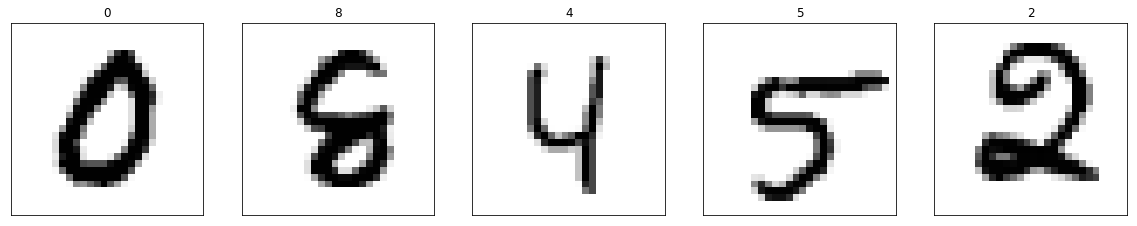

In [4]:
show_examples(X_train[10:15], Y_train[10:15],classes=get_mnist_labels())

# Step 1: Lets determine 1st Layer Kernels (16/32/64)
- I believe 32 will be best, 64 is too many for Mnist and 16 too little

In [5]:

model = Sequential()

 
model.add(Convolution2D(64, 3, 3, activation='relu', input_shape=(28,28,1))) # 26
model.add(Convolution2D(16, 1, activation='relu'))
model.add(Convolution2D(16, 3,3, activation='relu')) # 24
model.add(MaxPooling2D(pool_size=(2, 2))) # 12
model.add(Convolution2D(16, 3,3, activation='relu')) # 10
model.add(Convolution2D(32, 3,3, activation='relu')) # 8
model.add(Convolution2D(16, 1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #4
model.add(Convolution2D(10, 4,4))



model.add(Flatten())
model.add(Activation('softmax'))
print("Params = ",model.count_params())

model.compile(loss='categorical_crossentropy',
             optimizer="adam",
             metrics=['accuracy'])

train_history = model.fit(X_train, Y_train, batch_size=2048, epochs=10, verbose=0, shuffle=True, validation_split=0.1)
print("Layer Names: ",[layer.name for layer in model.layers[0:]])
val_metrics = (train_history.history['val_loss'][-1],train_history.history['val_acc'][-1])
print("Validation Loss",val_metrics)

_=evaluate(model,X_train, Y_train,classes=get_mnist_labels(),print_results=True, plot_results=False)
_=evaluate(model,X_test, Y_test,classes=get_mnist_labels(),print_results=True, plot_results=False)


Instructions for updating:
Colocations handled automatically by placer.
Params =  14058
Instructions for updating:
Use tf.cast instead.
Layer Names:  ['conv2d_1', 'conv2d_2', 'conv2d_3', 'max_pooling2d_1', 'conv2d_4', 'conv2d_5', 'conv2d_6', 'max_pooling2d_2', 'conv2d_7', 'flatten_1', 'activation_1']
Validation Loss (0.08801601054271062, 0.9735000052452087)
 =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-= 
Total Model Params =  14058
Score =  [0.0849143678728491, 0.9748]
Balanced Accuracy = 97.46% 
 =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-= 
Total Model Params =  14058
Score =  [0.07247515196055174, 0.9782]
Balanced Accuracy = 97.81% 


In [6]:
K.epsilon()

1e-07

Compute filters 0 to 16
Costs of filter   0:     2 ( 0.34s )
Costs of filter   1:     7 ( 0.27s )
Costs of filter   2:     7 ( 0.27s )
Costs of filter   3:     5 ( 0.30s )
Costs of filter   4:     3 ( 0.28s )
Costs of filter   5:     3 ( 0.31s )
Costs of filter   6:     0 ( 0.28s )
Costs of filter   7:     3 ( 0.29s )
Costs of filter   8:     6 ( 0.28s )
Costs of filter   9:     6 ( 0.28s )
Costs of filter  10:     2 ( 0.30s )
Costs of filter  11:     5 ( 0.29s )
Costs of filter  12:     2 ( 0.29s )
Costs of filter  13:     4 ( 0.29s )
Costs of filter  14:     7 ( 0.31s )
Costs of filter  15:     1 ( 0.29s )
16 filter processed.
Filter Losses
 [2.0447674, 6.889758, 7.122809, 4.9044886, 3.0117686, 2.620399, 0.0, 2.693318, 6.111451, 6.2265534, 1.6244435, 4.9215384, 2.0372577, 4.297293, 6.8183174, 1.355717]


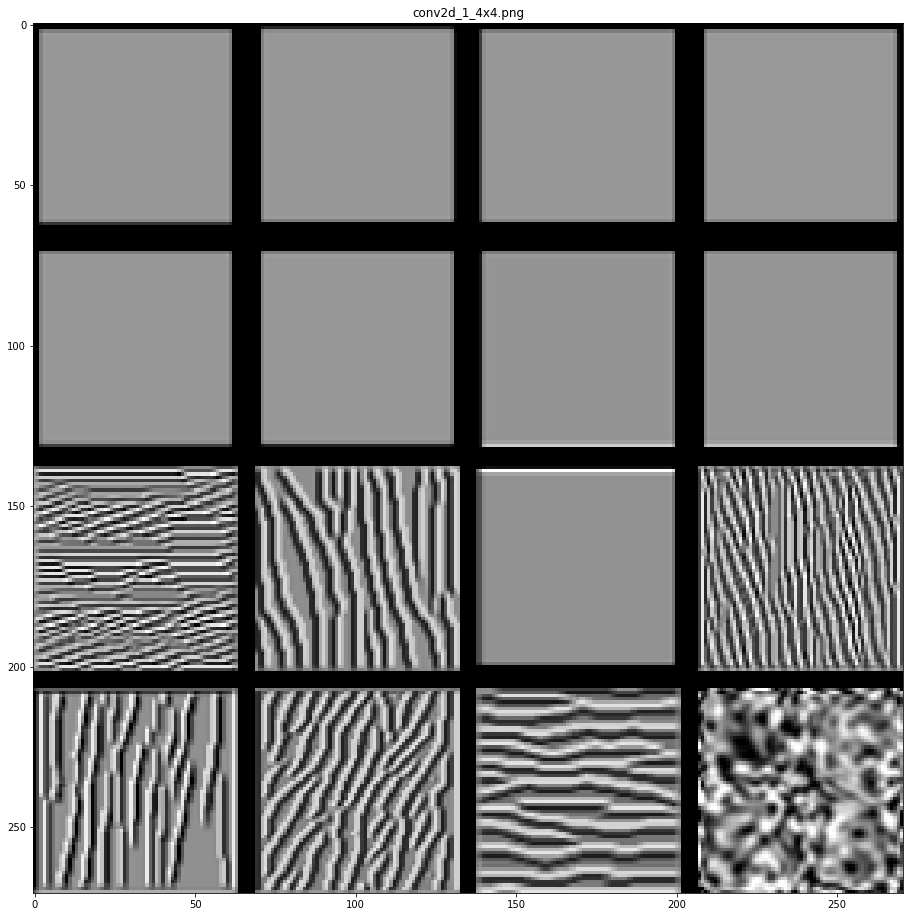

In [7]:

visualize_layer(model,"conv2d_1",filter_range=(0,16),upscaling_steps=10,
                    upscaling_factor=1.05,
                    output_dim=(64, 64))

Notice how multiple filters are blank, That tells us that 64 is too much. We did Kernel Pruning manually

In [11]:

model = Sequential()

 
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1))) # 26
model.add(Convolution2D(32, 3,3, activation='relu')) # 24
model.add(Convolution2D(16, 1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # 12
model.add(Convolution2D(16, 3,3, activation='relu')) # 10
model.add(Convolution2D(16, 3,3, activation='relu')) # 8
model.add(Convolution2D(16, 3,3, activation='relu')) # 6
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 6,6))



model.add(Flatten())
model.add(Activation('softmax'))
print("Params = ",model.count_params())

model.compile(loss='categorical_crossentropy',
             optimizer="adam",
             metrics=['accuracy'])

train_history = model.fit(X_train, Y_train, batch_size=2048, epochs=20, verbose=0, shuffle=True, validation_split=0.1)
print("Layer Names: ",[layer.name for layer in model.layers[0:]])
val_metrics = (train_history.history['val_loss'][-1],train_history.history['val_acc'][-1])
print("Validation Loss",val_metrics)

_=evaluate(model,X_train, Y_train,classes=get_mnist_labels(),print_results=True, plot_results=False)
_=evaluate(model,X_test, Y_test,classes=get_mnist_labels(),print_results=True, plot_results=False)


Params =  16068
Layer Names:  ['conv2d_16', 'conv2d_17', 'conv2d_18', 'max_pooling2d_4', 'conv2d_19', 'conv2d_20', 'conv2d_21', 'conv2d_22', 'conv2d_23', 'flatten_3', 'activation_3']
Validation Loss (0.056972250660260515, 0.9826666730244954)
 =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-= 
Total Model Params =  16068
Score =  [0.04955125305798526, 0.9851666666666666]
Balanced Accuracy = 98.51% 
 =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-= 
Total Model Params =  16068
Score =  [0.04613042632024735, 0.9846]
Balanced Accuracy = 98.45% 


In [0]:
import time
import numpy as np
from PIL import Image as pil_image
from keras.preprocessing.image import save_img
from keras import layers
from keras.applications import vgg16
from keras import backend as K
import matplotlib.pyplot as plt


def normalize(x):
    """utility function to normalize a tensor.

    # Arguments
        x: An input tensor.

    # Returns
        The normalized input tensor.
    """
    return x / (K.sqrt(K.mean(K.square(x))) + K.epsilon())


def deprocess_image(x):
    """utility function to convert a float array into a valid uint8 image.

    # Arguments
        x: A numpy-array representing the generated image.

    # Returns
        A processed numpy-array, which could be used in e.g. imshow.
    """
    # normalize tensor: center on 0., ensure std is 0.25
    x -= x.mean()
    x /= (x.std() + K.epsilon())
    x *= 0.25

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    if K.image_data_format() == 'channels_first':
        x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x


def process_image(x, former):
    """utility function to convert a valid uint8 image back into a float array.
       Reverses `deprocess_image`.

    # Arguments
        x: A numpy-array, which could be used in e.g. imshow.
        former: The former numpy-array.
                Need to determine the former mean and variance.

    # Returns
        A processed numpy-array representing the generated image.
    """
    if K.image_data_format() == 'channels_first':
        x = x.transpose((2, 0, 1))
    return (x / 255 - 0.5) * 4 * former.std() + former.mean()


def visualize_layer(model,
                    layer_name,
                    step=0.5,
                    epochs=20,
                    upscaling_steps=10,
                    upscaling_factor=1.2,
                    output_dim=(128, 128),
                    filter_range=(0, None),
                    grid_columns=4,
                    show_filters=True):
    """Visualizes the most relevant filters of one conv-layer in a certain model.

    # Arguments
        model: The model containing layer_name.
        layer_name: The name of the layer to be visualized.
                    Has to be a part of model.
        step: step size for gradient ascent.
        epochs: Number of iterations for gradient ascent.
        upscaling_steps: Number of upscaling steps.
                         Starting image is in this case (80, 80).
        upscaling_factor: Factor to which to slowly upgrade
                          the image towards output_dim.
        output_dim: [img_width, img_height] The output image dimensions.
        filter_range: Tupel[lower, upper]
                      Determines the to be computed filter numbers.
                      If the second value is `None`,
                      the last filter will be inferred as the upper boundary.
    """

    def _generate_filter_image(input_img,
                               layer_output,
                               filter_index,
                               channels=3):
        """Generates image for one particular filter.

        # Arguments
            input_img: The input-image Tensor.
            layer_output: The output-image Tensor.
            filter_index: The to be processed filter number.
                          Assumed to be valid.

        #Returns
            Either None if no image could be generated.
            or a tuple of the image (array) itself and the last loss.
        """
        s_time = time.time()

        # we build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        if K.image_data_format() == 'channels_first':
            loss = K.mean(layer_output[:, filter_index, :, :])
        else:
            loss = K.mean(layer_output[:, :, :, filter_index])
            
        

        # we compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, input_img)[0]

        # normalization trick: we normalize the gradient
        grads = normalize(grads)

        # this function returns the loss and grads given the input picture
        iterate = K.function([input_img], [loss, grads])

        # we start from a gray image with some random noise
        intermediate_dim = tuple(
            int(x / (upscaling_factor ** upscaling_steps)) for x in output_dim)

        def _get_input_random_image():
            if K.image_data_format() == 'channels_first':
                input_img_data = np.random.random(
                    (1, channels, intermediate_dim[0], intermediate_dim[1]))
            else:
                input_img_data = np.random.random(
                    (1, intermediate_dim[0], intermediate_dim[1], channels))
            input_img_data = (input_img_data - 0.5) * 20 + 128
            return input_img_data

        input_img_data = _get_input_random_image()

        # Slowly upscaling towards the original size prevents
        # a dominating high-frequency of the to visualized structure
        # as it would occur if we directly compute the 412d-image.
        # Behaves as a better starting point for each following dimension
        # and therefore avoids poor local minima
        losses, grads = [],[]
        for up in reversed(range(upscaling_steps)):
            
            # we run gradient ascent for e.g. 20 steps
            for epoch in range(epochs):
                
                loss_value, grads_value = iterate([input_img_data])
                losses.append(loss_value)
                grads.append(np.mean(np.abs(grads_value)))


                # some filters get stuck to 0, we can skip them
                if np.sum(losses) <= 1e-04 or (epoch%10==0 and len(losses)>1 and np.diff(losses)[-1]<1):
                    print("Re gen image for no loss decrease", epochs)
                    input_img_data = _get_input_random_image()
                    # pass
                    # return None
                input_img_data += grads_value * step

            print(np.diff(losses)[-1],losses[-1],grads[-1],np.std(input_img_data))
            # Calulate upscaled dimension
            intermediate_dim = tuple(
                int(x / (upscaling_factor ** up)) for x in output_dim)
            # Upscale
            mode = "L" if channels == 1 else None
            img = deprocess_image(input_img_data[0])
            if channels == 1:
                img = img.reshape((img.shape[0], img.shape[1]))
                img = np.array(pil_image.fromarray(img, mode).resize(intermediate_dim,
                                                                     pil_image.BICUBIC))
                img = img.reshape((img.shape[0], img.shape[1], 1))
            else:
                img = np.array(pil_image.fromarray(img).resize(intermediate_dim,
                                                               pil_image.BICUBIC))
            input_img_data = [process_image(img, input_img_data[0])]

        # decode the resulting input image
        img = deprocess_image(input_img_data[0])
        e_time = time.time()
        print('Costs of filter {:3}: {:5.0f} ( {:4.2f}s )'.format(filter_index,
                                                                  loss_value,
                                                                  e_time - s_time))
        return img, loss_value

    def _draw_filters(filters, columns=4, show_filters=True, channels=3):
        """Draw the best filters in a nxn grid.

        # Arguments
            filters: A List of generated images and their corresponding losses
                     for each processed filter.
            n: dimension of the grid.
               If none, the largest possible square will be used
        """

        rows = int(np.ceil(len(filters) / columns))

        output_dim = (filters[0][0].shape[0], filters[0][0].shape[1])

        # the filters that have the highest loss are assumed to be better-looking.
        # we will only keep the top n*n filters.
        filters.sort(key=lambda x: x[1], reverse=True)

        # build a black picture with enough space for
        # e.g. our 8 x 8 filters of size 412 x 412, with a 5px margin in between
        MARGIN = 5
        width = rows * output_dim[0] + (rows - 1) * MARGIN
        height = columns * output_dim[1] + (columns - 1) * MARGIN
        stitched_filters = np.zeros((width, height, channels), dtype='uint8')
        # fill the picture with our saved filters
        for i in range(rows):
            for j in range(columns):
                idx = min(i * columns + j, len(filters) - 1)
                if i * columns + j > len(filters) - 1:
                    img = np.zeros_like(filters[0][0])
                else:
                    img, _ = filters[idx]
                width_margin = (output_dim[0] + MARGIN) * i
                height_margin = (output_dim[1] + MARGIN) * j
                stitched_filters[
                width_margin: width_margin + output_dim[0],
                height_margin: height_margin + output_dim[1], :] = img
        if show_filters:
            fig_height = rows * 4
            fig_width = columns * 4

            fig = plt.figure(figsize=(fig_width, fig_height))
            plt.imshow(stitched_filters)
            plt.title('{0:}_{1:}x{2:}.png'.format(layer_name, rows, columns))
            plt.show()
        # save the result to disk
        save_img('{0:}_{1:}x{2:}.png'.format(layer_name, rows, columns), stitched_filters)

    # this is the placeholder for the input images
    assert len(model.inputs) == 1
    input_img = model.inputs[0]
    channels = K.int_shape(model.inputs[0])[-1]

    # get the symbolic outputs of each "key" layer (we gave them unique names).
    layer_dict = dict([(layer.name, layer) for layer in model.layers[0:]])

    output_layer = layer_dict[layer_name]
    assert isinstance(output_layer, layers.Conv2D)

    # Compute to be processed filter range
    filter_lower = filter_range[0]
    filter_upper = (filter_range[1]
                    if filter_range[1] is not None
                    else len(output_layer.get_weights()[1]))
    assert (filter_lower >= 0
            and filter_upper <= len(output_layer.get_weights()[1])
            and filter_upper > filter_lower)
    print('Compute filters {:} to {:}'.format(filter_lower, filter_upper))

    # iterate through each filter and generate its corresponding image
    processed_filters = []
    for f in range(filter_lower, filter_upper):
        img_loss = _generate_filter_image(input_img, output_layer.output, f, channels)

        if img_loss is not None:
            processed_filters.append(img_loss)

    print('{} filter processed.'.format(len(processed_filters)))
    # Finally draw and store the best filters to disk

    print("Filter Losses\n",[loss for f, loss in processed_filters])
    _draw_filters(processed_filters, grid_columns, show_filters)


# if __name__ == '__main__':
#     # the name of the layer we want to visualize
#     # (see model definition at keras/applications/vgg16.py)
#     LAYER_NAME = 'block5_conv1'

#     # build the VGG16 network with ImageNet weights
#     vgg = vgg16.VGG16(weights='imagenet', include_top=False)
#     print('Model loaded.')
#     vgg.summary()

#     # example function call
#     visualize_layer(vgg, LAYER_NAME, filter_range=(0, 8))

Compute filters 0 to 1
Re gen image for no loss decrease 100
Re gen image for no loss decrease 100
Re gen image for no loss decrease 100
Re gen image for no loss decrease 100
Re gen image for no loss decrease 100
Re gen image for no loss decrease 100
Re gen image for no loss decrease 100
Re gen image for no loss decrease 100
Re gen image for no loss decrease 100
0.06731415 82.445465 0.95213 5.912082189868209
Re gen image for no loss decrease 100
Re gen image for no loss decrease 100
Re gen image for no loss decrease 100
Re gen image for no loss decrease 100
Re gen image for no loss decrease 100
Re gen image for no loss decrease 100
Re gen image for no loss decrease 100
Re gen image for no loss decrease 100
Re gen image for no loss decrease 100
Re gen image for no loss decrease 100
0.06718445 82.72452 0.9539432 5.804545810665935
Re gen image for no loss decrease 100
Re gen image for no loss decrease 100
Re gen image for no loss decrease 100
Re gen image for no loss decrease 100
Re gen i

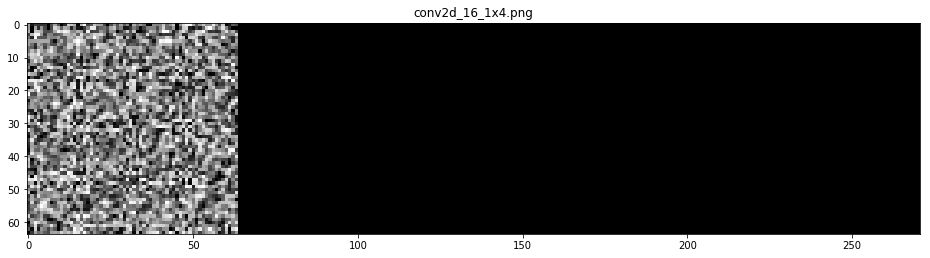

In [57]:
visualize_layer(model,"conv2d_16",filter_range=(0,1),upscaling_steps=20,
                    upscaling_factor=1.05,
                    output_dim=(64, 64),step=0.1,epochs=100)

Compute filters 0 to 16
Costs of filter   0:    16 ( 0.55s )
Costs of filter   1:    19 ( 0.53s )
Costs of filter   2:     6 ( 0.55s )
Costs of filter   3:    13 ( 0.55s )
Costs of filter   4:    12 ( 0.54s )
Costs of filter   5:    12 ( 0.55s )
Costs of filter   6:     7 ( 0.56s )
Costs of filter   7:    29 ( 0.55s )
Costs of filter   8:     4 ( 0.59s )
Costs of filter   9:     6 ( 0.57s )
Costs of filter  10:    27 ( 0.56s )
Costs of filter  11:     0 ( 0.57s )
Costs of filter  12:    29 ( 0.56s )
Costs of filter  13:    22 ( 0.57s )
Costs of filter  14:     8 ( 0.58s )
Costs of filter  15:     8 ( 0.57s )
16 filter processed.
Filter Losses
 [15.927879, 19.082657, 5.772021, 13.316014, 12.193873, 11.679832, 7.114999, 29.036581, 3.657278, 6.1313553, 26.771832, 0.0, 28.682844, 21.923552, 7.769362, 8.295335]


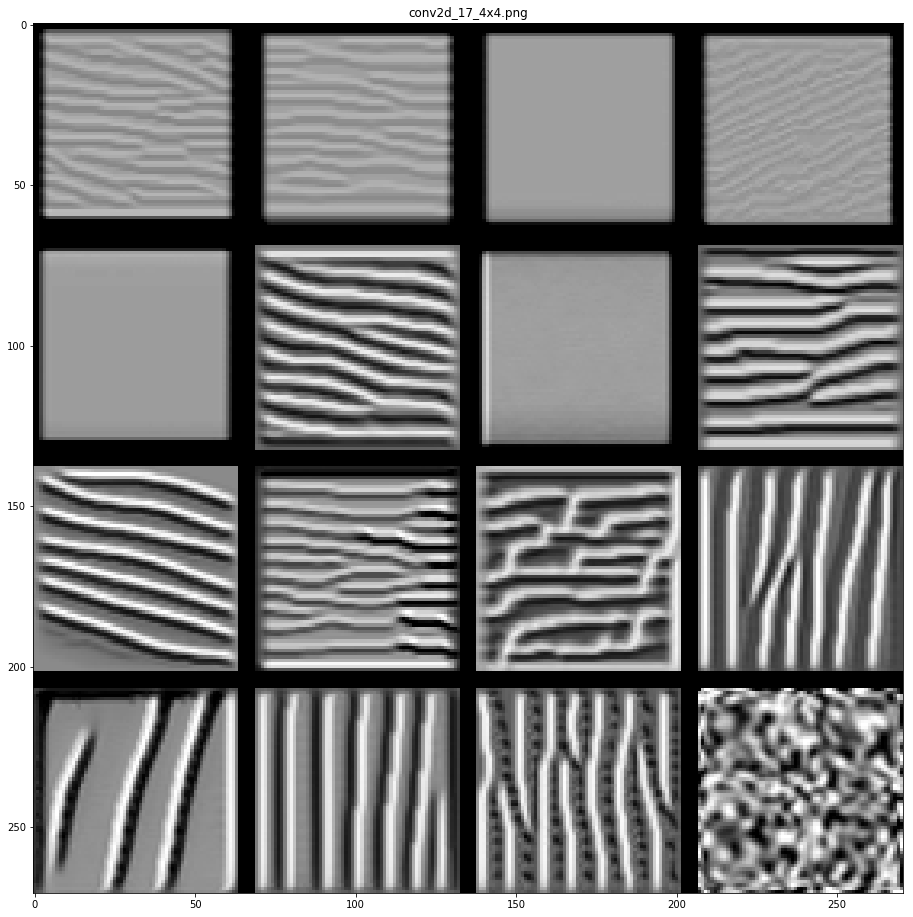

In [14]:
  visualize_layer(model,"conv2d_17",filter_range=(0,16),upscaling_steps=10,
                    upscaling_factor=1.05,
                    output_dim=(64, 64))

In [28]:
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) # 26

model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(16, 3,3, activation='relu')) # 24
model.add(MaxPooling2D(pool_size=(2, 2))) #12

model.add(Convolution2D(16, 3,3, activation='relu')) # 10
model.add(Convolution2D(16, 3,3, activation='relu')) # 8
model.add(Convolution2D(16, 3,3, activation='relu')) #6
model.add(Convolution2D(10, 1, activation='relu')) #6
model.add(Convolution2D(10, 6,6))

model.add(Flatten())
model.add(Activation('softmax'))
print("Params = ",model.count_params())


model.compile(loss='categorical_crossentropy',
             optimizer="adam",
             metrics=['accuracy'])

train_history = model.fit(X_train, Y_train, batch_size=2048, epochs=10, verbose=0, shuffle=True, validation_split=0.1)
print("Layer Names: ",[layer.name for layer in model.layers[0:]])
val_metrics = (train_history.history['val_loss'][-1],train_history.history['val_acc'][-1])
print("Validation Loss",val_metrics)

_=evaluate(model,X_train, Y_train,classes=get_mnist_labels(),print_results=True, plot_results=False)
_=evaluate(model,X_test, Y_test,classes=get_mnist_labels(),print_results=True, plot_results=False)


Params =  12846
 =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-= 
Total Model Params =  12846
Score =  [0.09841032130097349, 0.96985]
Balanced Accuracy = 96.96% 
 =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-= 
Total Model Params =  12846
Score =  [0.08523574805110692, 0.9738]
Balanced Accuracy = 97.35% 


In [0]:
visualize_layer(model,"conv2d_193",filter_range=(0,16),upscaling_steps=10,
                    upscaling_factor=1.05,
                    output_dim=(64, 64))

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_74 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 26, 26, 16)        1040      
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 24, 24, 16)        2320      
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 22, 22, 16)        2320      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 11, 11, 16)        0         
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 9, 9, 16)          2320      
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 7, 7, 32)          4640      
__________

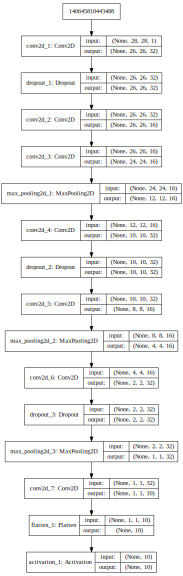

In [0]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

m2d = model_to_dot(model, show_shapes=True,)
m2d.set_size('8x18')
SVG(m2d.create(prog='dot', format='svg'))